In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [ ]:
# Load dataset

In [6]:
df = pd.read_csv("Tuberculosis_Dataset.csv")

In [ ]:
# Display basic information

In [9]:
display(df.info())
display(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Country                            400000 non-null  object 
 1   Year                               400000 non-null  int64  
 2   TB_Incidence_Rate                  400000 non-null  float64
 3   Population                         400000 non-null  int64  
 4   HIV_Prevalence                     400000 non-null  float64
 5   Treatment_Success_Rate             400000 non-null  float64
 6   Mortality_Rate                     400000 non-null  float64
 7   Urban_Population_Percentage        400000 non-null  float64
 8   Smoking_Rate                       400000 non-null  float64
 9   Alcohol_Consumption                400000 non-null  float64
 10  Healthcare_Expenditure_Per_Capita  400000 non-null  float64
 11  Primary_Healthcare_Access          4000

None

,Country,Year,TB_Incidence_Rate,Population,HIV_Prevalence,Treatment_Success_Rate,Mortality_Rate,Urban_Population_Percentage,Smoking_Rate,Alcohol_Consumption,...,Age_Group,Gender,HIV_CoInfection_Rate,BCG_Vaccination_Coverage,Multidrug_Resistance_Rate,Unemployment_Rate,GDP_Per_Capita,Life_Expectancy,TB_Screening_Coverage,Rural_Population_Percentage
0,Country_52,2003,56.145286,788566,15.124856,63.008939,18.417301,39.939777,38.323440,13.115522,...,25-54,Female,4.491676,87.163577,1.405499,27.964788,98235.258489,41.642988,53.486072,89.256182
1,Country_15,2021,137.470346,1282706,1.365238,63.861596,25.804928,78.360506,48.317584,13.676533,...,0-14,Female,0.527789,61.848695,4.022342,29.374837,35130.172901,63.968269,76.473413,42.549955
2,Country_61,2014,179.814220,1100374,13.770958,92.017009,15.319141,27.609710,9.085422,3.070677,...,65+,Female,0.977231,63.133755,14.618375,23.704493,24703.776975,81.883098,59.468310,29.938714
3,Country_21,2014,124.211205,1141641,8.198825,94.747900,9.405584,73.239525,39.927303,7.360397,...,65+,Male,3.218930,55.069057,5.758827,21.854778,16417.483760,64.295034,96.677854,32.578901
4,Country_24,2011,50.394259,759040,4.472235,83.710431,37.830973,11.821832,48.280581,4.958237,...,55-64,Female,1.938210,70.991237,0.201211,23.512661,60373.614322,52.874425,88.048894,17.109448


In [ ]:
# Check for missing values

In [11]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 Series([], dtype: int64)


In [ ]:
# Remove duplicate rows

In [13]:
df = df.drop_duplicates()
print("Duplicate Rows Removed")

Duplicate Rows Removed


In [ ]:
# Ensure correct data types

In [15]:
print("\nColumn Data Types:\n", df.dtypes)


Column Data Types:
 Country                               object
Year                                   int64
TB_Incidence_Rate                    float64
Population                             int64
HIV_Prevalence                       float64
Treatment_Success_Rate               float64
Mortality_Rate                       float64
Urban_Population_Percentage          float64
Smoking_Rate                         float64
Alcohol_Consumption                  float64
Healthcare_Expenditure_Per_Capita    float64
Primary_Healthcare_Access            float64
Age_Group                             object
Gender                                object
HIV_CoInfection_Rate                 float64
BCG_Vaccination_Coverage             float64
Multidrug_Resistance_Rate            float64
Unemployment_Rate                    float64
GDP_Per_Capita                       float64
Life_Expectancy                      float64
TB_Screening_Coverage                float64
Rural_Population_Percentage       

In [ ]:
# Checking numerical columns for outliers using boxplots

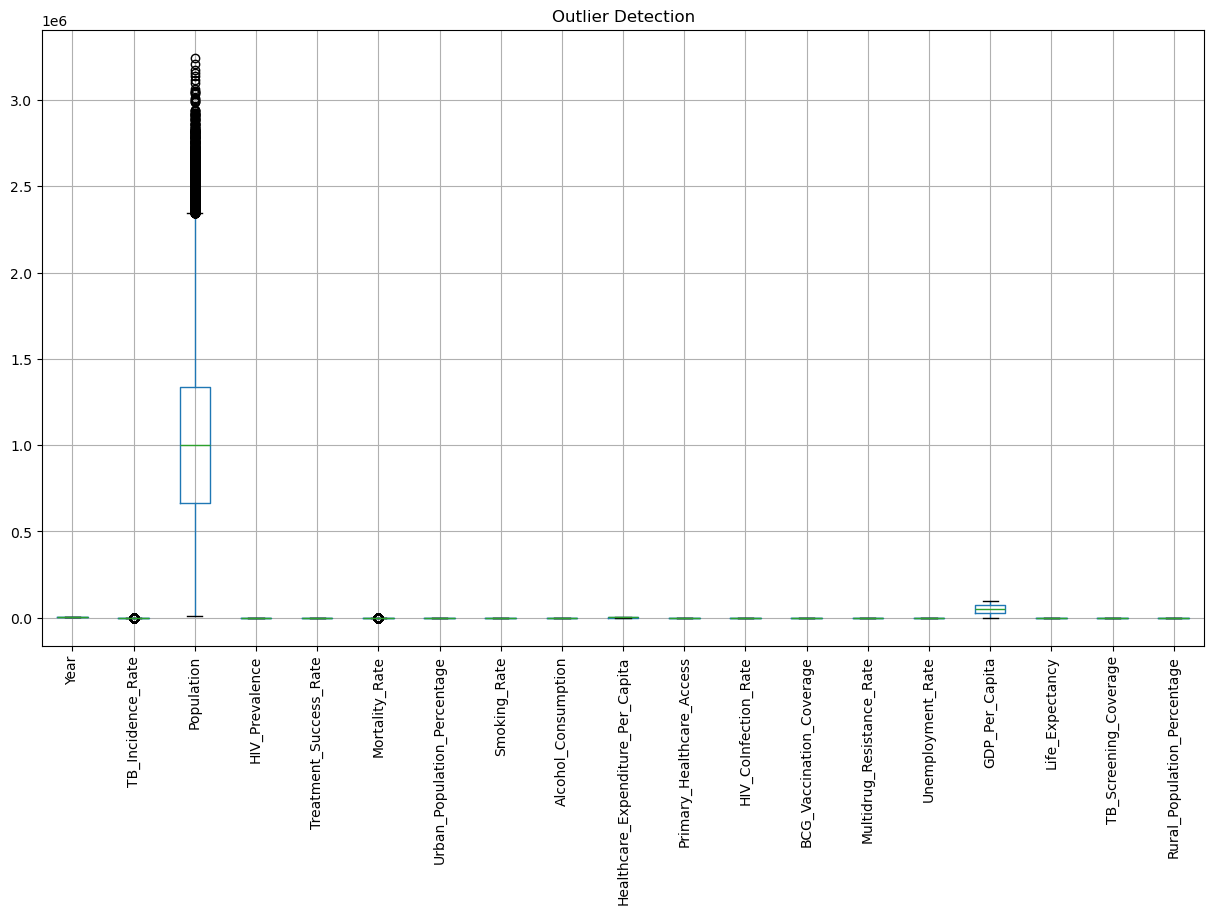

In [17]:
plt.figure(figsize=(15, 8))
df.boxplot(rot=90)
plt.title("Outlier Detection")
plt.show()


In [ ]:
# Checking for inconsistencies in categorical columns

In [19]:
print("\nUnique Values in Categorical Columns:")
for col in ["Country", "Age_Group", "Gender"]:
    print(f"{col}: {df[col].unique()}")


Unique Values in Categorical Columns:
Country: ['Country_52' 'Country_15' 'Country_61' 'Country_21' 'Country_24'
 'Country_3' 'Country_22' 'Country_53' 'Country_2' 'Country_30'
 'Country_38' 'Country_64' 'Country_60' 'Country_33' 'Country_58'
 'Country_49' 'Country_59' 'Country_42' 'Country_62' 'Country_47'
 'Country_51' 'Country_55' 'Country_7' 'Country_39' 'Country_18'
 'Country_4' 'Country_14' 'Country_9' 'Country_44' 'Country_8'
 'Country_35' 'Country_36' 'Country_50' 'Country_6' 'Country_54'
 'Country_63' 'Country_34' 'Country_48' 'Country_40' 'Country_26'
 'Country_41' 'Country_29' 'Country_45' 'Country_65' 'Country_1'
 'Country_11' 'Country_5' 'Country_28' 'Country_12' 'Country_23'
 'Country_37' 'Country_27' 'Country_43' 'Country_13' 'Country_32'
 'Country_66' 'Country_57' 'Country_70' 'Country_56' 'Country_19'
 'Country_68' 'Country_17' 'Country_69' 'Country_16' 'Country_20'
 'Country_67' 'Country_31' 'Country_25' 'Country_46' 'Country_10']
Age_Group: ['25-54' '0-14' '65+' '55

In [ ]:
# Check if Urban and Rural Population Percentages sum to ~100%

In [21]:
df["Total_Population_Percentage"] = df["Urban_Population_Percentage"] + df["Rural_Population_Percentage"]
inconsistent_population = df[(df["Total_Population_Percentage"] < 99) | (df["Total_Population_Percentage"] > 101)]
print("\nRows with Inconsistent Population Percentage:")
display(inconsistent_population)


Rows with Inconsistent Population Percentage:


,Country,Year,TB_Incidence_Rate,Population,HIV_Prevalence,Treatment_Success_Rate,Mortality_Rate,Urban_Population_Percentage,Smoking_Rate,Alcohol_Consumption,...,Gender,HIV_CoInfection_Rate,BCG_Vaccination_Coverage,Multidrug_Resistance_Rate,Unemployment_Rate,GDP_Per_Capita,Life_Expectancy,TB_Screening_Coverage,Rural_Population_Percentage,Total_Population_Percentage
0,Country_52,2003,56.145286,788566,15.124856,63.008939,18.417301,39.939777,38.323440,13.115522,...,Female,4.491676,87.163577,1.405499,27.964788,98235.258489,41.642988,53.486072,89.256182,129.195959
1,Country_15,2021,137.470346,1282706,1.365238,63.861596,25.804928,78.360506,48.317584,13.676533,...,Female,0.527789,61.848695,4.022342,29.374837,35130.172901,63.968269,76.473413,42.549955,120.910461
2,Country_61,2014,179.814220,1100374,13.770958,92.017009,15.319141,27.609710,9.085422,3.070677,...,Female,0.977231,63.133755,14.618375,23.704493,24703.776975,81.883098,59.468310,29.938714,57.548424
3,Country_21,2014,124.211205,1141641,8.198825,94.747900,9.405584,73.239525,39.927303,7.360397,...,Male,3.218930,55.069057,5.758827,21.854778,16417.483760,64.295034,96.677854,32.578901,105.818425
4,Country_24,2011,50.394259,759040,4.472235,83.710431,37.830973,11.821832,48.280581,4.958237,...,Female,1.938210,70.991237,0.201211,23.512661,60373.614322,52.874425,88.048894,17.109448,28.931281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,Country_53,2004,169.787616,660860,10.276245,78.481571,22.047078,22.734980,33.680575,9.620027,...,Male,1.584840,94.925027,6.234854,10.147965,90021.693437,57.804647,75.950046,41.995757,64.730737
399996,Country_46,2009,193.569717,1189183,3.147915,68.693823,29.024622,13.694117,31.240885,5.127701,...,Male,2.972354,80.601166,4.926648,1.937516,58162.817946,68.721109,88.876142,43.274853,56.968970
399997,Country_8,2019,180.934211,1031969,14.985351,88.738280,14.540239,45.215312,44.383766,9.909989,...,Male,1.775331,52.275679,6.439025,4.549042,6778.323905,66.494715,79.835039,64.421630,109.636942
399998,Country_49,2021,207.300043,1076404,5.876641,69.758055,18.467550,81.458567,27.242929,6.147466,...,Male,2.377095,54.302045,16.140677,29.894668,61021.649800,82.612641,57.225886,12.379654,93.838221


In [ ]:
# Remove temporary column

In [23]:
df.drop(columns=["Total_Population_Percentage"], inplace=True)

In [ ]:
# Data Preprocessing

In [ ]:
# Encoding categorical variables

In [29]:
label_encoders = {}
for col in ["Country", "Age_Group", "Gender"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [31]:
# Feature Scaling

In [33]:
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [35]:
# Save preprocessed dataset

In [37]:
df.to_csv("Preprocessed_Tuberculosis_Dataset.csv", index=False)
print("Preprocessed dataset saved successfully.")

Preprocessed dataset saved successfully.


In [38]:
# Data Visualization

In [43]:
sns.set_style("whitegrid")

In [45]:
# TB Incidence Rate Distribution

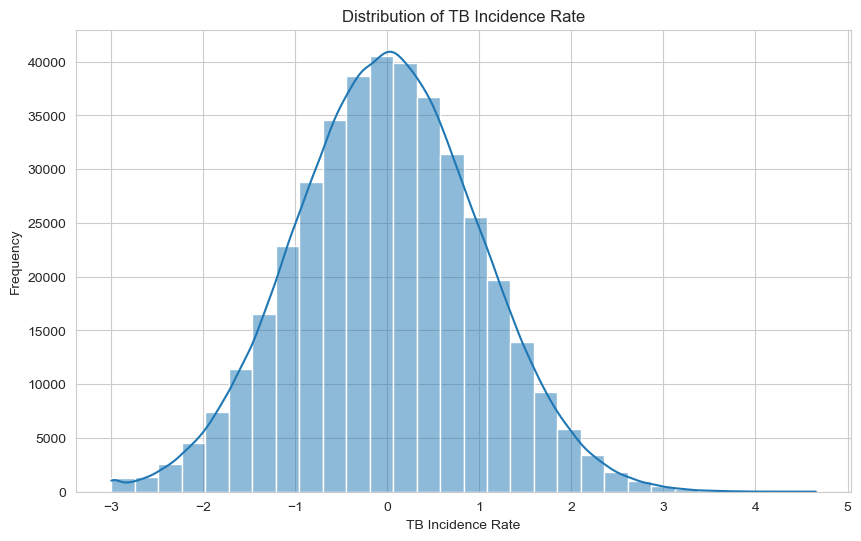

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(df["TB_Incidence_Rate"], bins=30, kde=True)
plt.title("Distribution of TB Incidence Rate")
plt.xlabel("TB Incidence Rate")
plt.ylabel("Frequency")
plt.show()

In [49]:
# Mortality Rate by Country (Top 10)

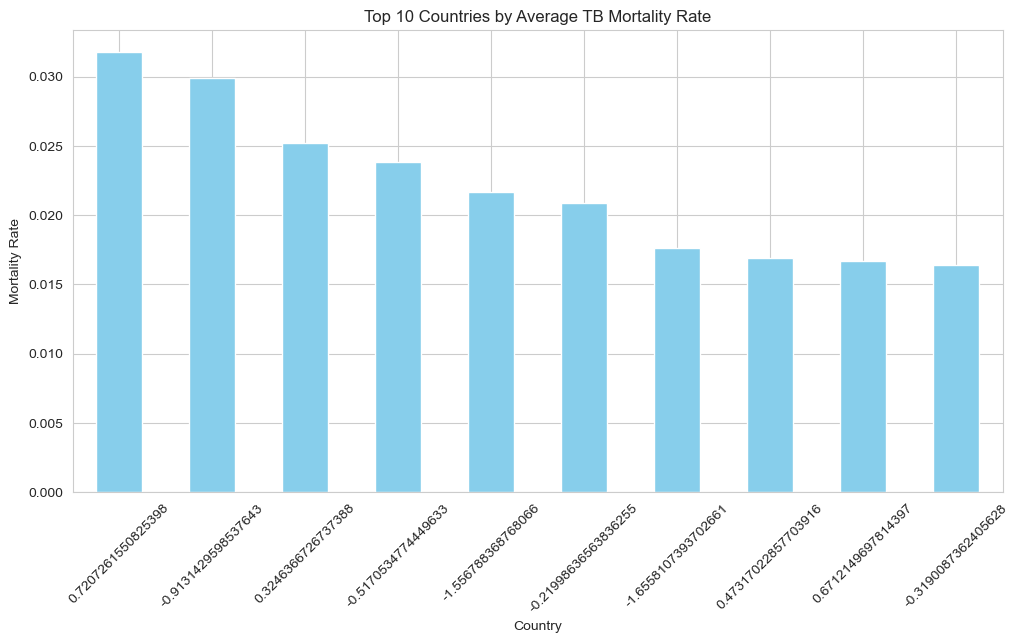

In [51]:
top_countries = df.groupby("Country")["Mortality_Rate"].mean().nlargest(10)
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.title("Top 10 Countries by Average TB Mortality Rate")
plt.xlabel("Country")
plt.ylabel("Mortality Rate")
plt.xticks(rotation=45)
plt.show()

In [53]:
# TB Incidence Rate Over the Years

<Axes: xlabel='Year', ylabel='TB_Incidence_Rate'>

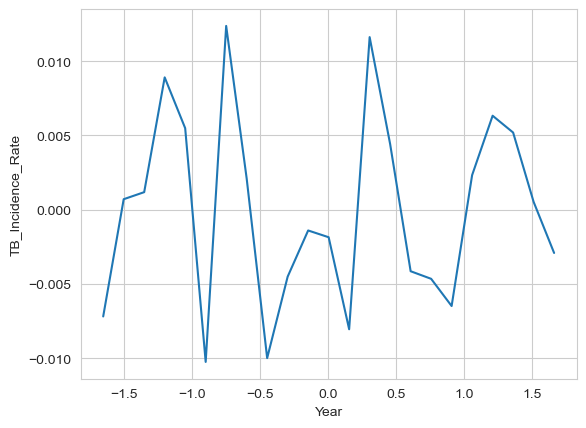

In [59]:
sns.lineplot(x="Year", y="TB_Incidence_Rate", data=df, errorbar=None)


In [65]:
# Correlation Heatmap (Only Numerical Columns)

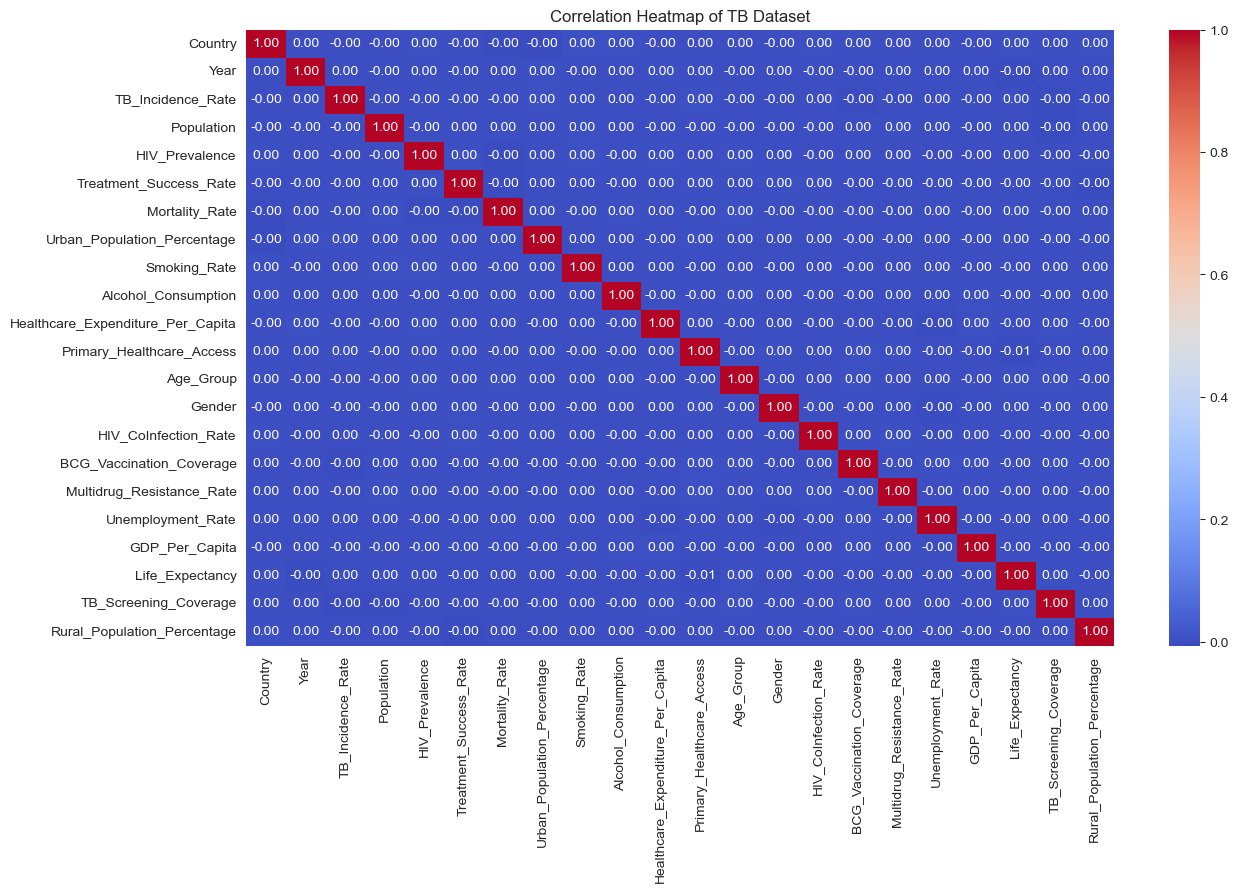

In [67]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of TB Dataset")
plt.show()